# Neural Network for Regression | Funda dataset

## Importing modules

In [8]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb

## 1. Funda_2018

In [2]:
# Load funda_2018 data
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
funda_2018 = data_loader.load_funda_data_2018()
print("Funda 2018 data loaded")

Funda 2018 data loaded


In [3]:
# Clean funda_2018 data
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner
funda_2018_cleaned = data_cleaner.cleaned_funda_2018(data=funda_2018)

Funda data 2018 cleaned


In [4]:
#funda_2018_cleaned.head(5)

,publicationDate,zipcode,sellingPrice,fullDescription,houseType,categoryObject,yearOfBuilding,garden,parcelSurface,numberRooms,numberBathrooms,energylabelClass,surface,sellingDate,sellingTime
0,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...","woonboot,vrijstaandewoning,",Woonhuis,1975,1,NaN,3,0.0,0,62,2018-11-12,104
1,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,"eengezinswoning,tussenwoning,",Woonhuis,1980,1,148.0,5,1.0,B,136,2018-08-30,-25
2,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - On the 21st of Septemb...,"tussenverdieping,appartement,",Appartement,2005,0,NaN,3,0.0,0,70,2018-11-23,113
3,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,"eengezinswoning,geschakelde2-onder-1-kapwoning,",Woonhuis,1973,1,244.0,5,0.0,0,144,2018-12-14,132
4,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,"woonboerderij,vrijstaandewoning,",Woonhuis,1900,0,4500.0,8,1.0,0,323,2018-12-06,123


In [237]:
funda_2018_cleaned['houseType'] = funda_2018_cleaned['houseType'].replace({'2-onder-1-kapwoning':'semi-detachedresidentialproperty', 'bel-etage':'Ground-floorapartment', 'beneden+bovenwoning':'Ground-floor+upstairsapartment', 'benedenwoning':'Residentialpropertywithsharedstreetentrance', 'bovenwoning':'Upstairsapartment', 'bungalow':'Bungalow', 'dubbelbenedenhuis':'Doubleground-floorapartment', 'eengezinswoning':'Single-familyhome', 'galerijflat':'Galleriedapartment', 'geschakelde2-onder-1-kapwoning':'linkedsemi-detachedresidentialproperty', 'grachtenpand':'Propertyalongsidecanal', 'halfvrijstaandewoning':'detachedresidentialproperty', 'hoekwoning':'cornerhouse', 'penthouse':'Penthouse', 'landgoed':'Countryestate', 'landhuis':'Countryhouse', 'maisonnette':'Maisonnette', 'stacaravan':'Mobilehome', 'semi-bungalow':'semi-detachedresidentialproperty', 'verspringend':'staggered', 'studentenkamer':'Studentroom', 'tussenverdieping':'Mezzanine', 'villa':'Villa', 'vrijstaandewoning':'Desirableresidence/villa', 'woonboerderij':'Convertedfarmhouse', 'woonboot':'Houseboat', 'OpenPortiek':'Apartmentwithsharedstreetentrance', 'OpenPortiek2':'Apartmentwithsharedstreetentrance', 'portiekflat':'Apartmentwithsharedstreetentrance', 'portiekwoning':'Apartmentwithsharedstreetentrance', 'dubbelbovenhuis':'doublehouse', 'appartement':'Apartmentwithsharedstreetentrance', 'bedrijfs-ofdienstwoning':'companyresidenceofficialresidence', 'corridorflat':'Apartmentwithsharedstreetentrance', 'dijkwoning':'dykehouse', 'drive-inwoning':'drive-in house', 'eindwoning':'Apartmentwithsharedstreetentrance', 'geschakeldewoning':'semi-detachedresidentialproperty', 'herenhuis':'mansion', 'hofjeswoning':'Countryhouse', 'kwadrantwoning':'quadranthouse', 'paalwoning':'stilthouse'}, 'patiowoning':'patiohouse', 'split-levelwoning':'split-levelhouse', 'tussenwoning':'rowhouse', 'verzorgingsflat':'nursing-home', 'waterwoning':'waterhouse', 'wind/watermolen':'wind/watermill', regex=True)

In [238]:
funda_2018_cleaned.head(10)

,zipcode,fullDescription,houseType,yearOfBuilding,garden,parcelSurface,numberRooms,numberBathrooms,surface,publicationDay,publicationMonth,publicationYear,categoryObject_Appartement,categoryObject_Woonhuis,energylabelClass_0,energylabelClass_A,energylabelClass_A+,energylabelClass_A++,energylabelClass_A+++,energylabelClass_A++++,energylabelClass_A+++++,energylabelClass_B,energylabelClass_C,energylabelClass_D,energylabelClass_E,energylabelClass_F,energylabelClass_G
0,1774PG,"Ruimte, vrijheid, en altijd het water en de we...","Houseboat,Desirableresidence/villa,",1975,1,NaN,3,0.0,62,31,7,2018,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7481LK,Verrassend ruime tussenwoning nabij het centru...,"Single-familyhome,tussenwoning,",1980,1,148.0,5,1.0,136,24,9,2018,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1068MS,- ENGLISH TRANSLATION - On the 21st of Septemb...,"Mezzanine,Apartmentwithsharedstreetentrance,",2005,0,NaN,3,0.0,70,2,8,2018,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5628EN,Wonen in een zeer royaal bemeten geschakelde 2...,"Single-familyhome,geschakeldesemi-detachedresi...",1973,1,244.0,5,0.0,144,4,8,2018,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,7731TV,Landgoed Junne is een eeuwenoud landgoed en li...,"Convertedfarmhouse,Desirableresidence/villa,",1900,0,4500.0,8,1.0,323,5,8,2018,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,5971CR,"In een rustige wijk, op korte afstand van het ...","Single-familyhome,cornerhouse,",1970,1,104.0,4,1.0,68,6,8,2018,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,9571BM,In landelijke woonomgeving en aan de doorgaand...,"Single-familyhome,Desirableresidence/villa,",1987,1,1028.0,5,0.0,184,6,8,2018,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,1031KA,Dit betreft bouwnummer 24 van het project Aan ...,"Apartmentwithsharedstreetentrance,",2019,0,NaN,3,0.0,105,12,8,2018,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,9076BK,"Levensloop bestendige, jaren 30 woning, met sl...","Single-familyhome,semi-detachedresidentialprop...",1933,0,371.0,4,0.0,93,12,8,2018,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,4465AL,Robuust woonhuis in klassiek stijl met heerlij...,"Single-familyhome,Desirableresidence/villa,",1998,1,880.0,5,2.0,156,8,9,2018,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


## Explore correlations

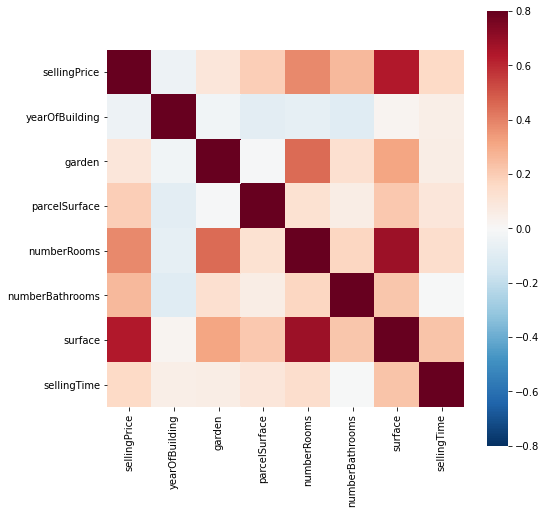

In [9]:
# Compute correlation
correlation_matrix = funda_2018_cleaned.corr()

# Open figure container
fig = plt.figure(figsize = (8,8))
# Make color heatmap (library seaborn)
sb.heatmap(correlation_matrix, vmax = 0.8, vmin=-0.8, square = True, cmap='RdBu_r')
# Display plot
plt.show()

## Prepare features funda_2018 for predicting the sales price

In [10]:
# create column with publication day, month and year
funda_2018_cleaned['publicationDay'] = pd.DatetimeIndex(funda_2018_cleaned['publicationDate']).day
funda_2018_cleaned['publicationMonth'] = pd.DatetimeIndex(funda_2018_cleaned['publicationDate']).month
funda_2018_cleaned['publicationYear'] = pd.DatetimeIndex(funda_2018_cleaned['publicationDate']).year
# dummy code categoryObject & energylabelClass
funda_2018_cleaned = pd.get_dummies(data=funda_2018_cleaned, columns=['categoryObject', 'energylabelClass'])
# drop columns publicationDate, sellingPrice, sellingTime and sellingDate
funda_2018_cleaned = funda_2018_cleaned.drop(columns=['publicationDate', 'sellingPrice', 'sellingTime', 'sellingDate'])

## Create new dataframe with houseTypes dummy codes

In [151]:
houseTypes_df_funda_2018 = funda_2018_cleaned['houseType'].str.get_dummies(sep=",")

In [45]:
#houseTypes_df.head(5)

,houseType2-onder-1-kapwoning,houseTypeOpenPortiek,houseTypeOpenPortiek2,houseTypeappartement,houseTypebedrijfs-ofdienstwoning,houseTypebel-etage,houseTypebeneden+bovenwoning,houseTypebenedenwoning,houseTypebovenwoning,houseTypebungalow,houseTypecorridorflat,houseTypedijkwoning,houseTypedrive-inwoning,houseTypedubbelbenedenhuis,houseTypedubbelbovenhuis,houseTypeeengezinswoning,houseTypeeindwoning,houseTypegalerijflat,houseTypegeschakelde2-onder-1-kapwoning,houseTypegeschakeldewoning,houseTypegrachtenpand,houseTypehalfvrijstaandewoning,houseTypeherenhuis,houseTypehoekwoning,houseTypehofjeswoning,houseTypekwadrantwoning,houseTypelandgoed,houseTypelandhuis,houseTypemaisonnette,houseTypepaalwoning,houseTypepatiowoning,houseTypepenthouse,houseTypeportiekflat,houseTypeportiekwoning,houseTypesemi-bungalow,houseTypeserviceflat,houseTypesouterrain,houseTypesplit-levelwoning,houseTypestacaravan,houseTypestudentenkamer,houseTypetussenverdieping,houseTypetussenwoning,houseTypeverspringend,houseTypeverzorgingsflat,houseTypevilla,houseTypevrijstaandewoning,houseTypewaterwoning,houseTypewind/watermolen,houseTypewoonboerderij,houseTypewoonboot
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [47]:
len(houseTypes_df_funda_2018.columns)

50

## Join houseType_df with funda_2018

In [109]:
joined_df = funda_2018_cleaned.join(houseTypes_df_funda_2018, how='right').drop(axis=1, columns='houseType')

In [110]:
joined_df.columns

Index(['zipcode', 'fullDescription', 'yearOfBuilding', 'garden',
       'parcelSurface', 'numberRooms', 'numberBathrooms', 'surface',
       'publicationDay', 'publicationMonth', 'publicationYear',
       'categoryObject_Appartement', 'categoryObject_Woonhuis',
       'energylabelClass_0', 'energylabelClass_A', 'energylabelClass_A+',
       'energylabelClass_A++', 'energylabelClass_A+++',
       'energylabelClass_A++++', 'energylabelClass_A+++++',
       'energylabelClass_B', 'energylabelClass_C', 'energylabelClass_D',
       'energylabelClass_E', 'energylabelClass_F', 'energylabelClass_G',
       '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2', 'appartement',
       'bedrijfs-ofdienstwoning', 'bel-etage', 'beneden+bovenwoning',
       'benedenwoning', 'bovenwoning', 'bungalow', 'corridorflat',
       'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis', 'dubbelbovenhuis',
       'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewo

In [111]:
#joined_df.head(5)

## 2. Zipcode data

In [112]:
# Load zipcode data
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
zipcode_data = data_loader.load_cbs_postcodes()
print("Zipcode data loaded")

Zipcode data loaded


In [113]:
# Clean zipcode data
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner
zipcode_data_cleaned = data_cleaner.clean_cbs_postcodes(data=zipcode_data)
zipcode_data_cleaned.head(5)

,zipcode,NeighborhoodCode,DistrictCode,Municipalitycode
0,1011AB,3630400,36304,363
1,1011AC,3630400,36304,363
2,1011AD,3630400,36304,363
3,1011AE,3630400,36304,363
4,1011AG,3630403,36304,363


## 3. Brt data

In [114]:
# load brt_2020
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
brt_data = data_loader.load_brt_2020()
print("Brt_data data loaded")

Brt_data data loaded


In [115]:
# clean brt_2020
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner
brt_data_cleaned = data_cleaner.clean_brt_2020(data=brt_data)
print("Brt_data cleaned")

Brt_data cleaned


In [116]:
brt_data_cleaned.columns

Index(['NeighborhoodCode', 'NeighborhoodName', 'Municipalitycode',
       'MunicipalityName', 'DistrictCode', 'DistrictName'],
      dtype='object')

# Joining csv files

In [117]:
# combine csv files funda_2018, pc6-gwb2020 (postcodes), join them on zipcode
funda_zipcode_df = joined_df.join(zipcode_data_cleaned.set_index('zipcode'), on='zipcode')

In [118]:
funda_zipcode_df.columns

Index(['zipcode', 'fullDescription', 'yearOfBuilding', 'garden',
       'parcelSurface', 'numberRooms', 'numberBathrooms', 'surface',
       'publicationDay', 'publicationMonth', 'publicationYear',
       'categoryObject_Appartement', 'categoryObject_Woonhuis',
       'energylabelClass_0', 'energylabelClass_A', 'energylabelClass_A+',
       'energylabelClass_A++', 'energylabelClass_A+++',
       'energylabelClass_A++++', 'energylabelClass_A+++++',
       'energylabelClass_B', 'energylabelClass_C', 'energylabelClass_D',
       'energylabelClass_E', 'energylabelClass_F', 'energylabelClass_G',
       '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2', 'appartement',
       'bedrijfs-ofdienstwoning', 'bel-etage', 'beneden+bovenwoning',
       'benedenwoning', 'bovenwoning', 'bungalow', 'corridorflat',
       'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis', 'dubbelbovenhuis',
       'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewo

In [119]:
# combine csv files funda_2018, pc6-gwb2020 and brt, join them on NeighborhoodCode
# right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
funda_zipcode_brt_df = funda_zipcode_df.merge(brt_data_cleaned, on='NeighborhoodCode', how='right')

In [120]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'yearOfBuilding', 'garden',
       'parcelSurface', 'numberRooms', 'numberBathrooms', 'surface',
       'publicationDay', 'publicationMonth', 'publicationYear',
       'categoryObject_Appartement', 'categoryObject_Woonhuis',
       'energylabelClass_0', 'energylabelClass_A', 'energylabelClass_A+',
       'energylabelClass_A++', 'energylabelClass_A+++',
       'energylabelClass_A++++', 'energylabelClass_A+++++',
       'energylabelClass_B', 'energylabelClass_C', 'energylabelClass_D',
       'energylabelClass_E', 'energylabelClass_F', 'energylabelClass_G',
       '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2', 'appartement',
       'bedrijfs-ofdienstwoning', 'bel-etage', 'beneden+bovenwoning',
       'benedenwoning', 'bovenwoning', 'bungalow', 'corridorflat',
       'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis', 'dubbelbovenhuis',
       'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewo

In [121]:
# inspect combined dataframe
# funda_zipcode_brt_df.head(5)
# drop columns NeighborhoodCode, DistrictCode_x, Municipalitycode_x and exclude _y from columns names
funda_zipcode_brt_df = funda_zipcode_brt_df.drop(columns=['NeighborhoodCode', 'DistrictCode_x', 'Municipalitycode_x', 'NeighborhoodName', 'MunicipalityName', 'DistrictName']).rename(columns={'Municipalitycode_y':'Municipalitycode', 'DistrictCode_y':'DistrictCode'})

In [122]:
funda_zipcode_brt_df.head(5)

,zipcode,fullDescription,yearOfBuilding,garden,parcelSurface,numberRooms,numberBathrooms,surface,publicationDay,publicationMonth,publicationYear,categoryObject_Appartement,categoryObject_Woonhuis,energylabelClass_0,energylabelClass_A,energylabelClass_A+,energylabelClass_A++,energylabelClass_A+++,energylabelClass_A++++,energylabelClass_A+++++,energylabelClass_B,energylabelClass_C,energylabelClass_D,energylabelClass_E,energylabelClass_F,energylabelClass_G,2-onder-1-kapwoning,OpenPortiek,OpenPortiek2,appartement,bedrijfs-ofdienstwoning,bel-etage,beneden+bovenwoning,benedenwoning,bovenwoning,bungalow,corridorflat,dijkwoning,drive-inwoning,dubbelbenedenhuis,dubbelbovenhuis,eengezinswoning,eindwoning,galerijflat,geschakelde2-onder-1-kapwoning,geschakeldewoning,grachtenpand,halfvrijstaandewoning,herenhuis,hoekwoning,hofjeswoning,kwadrantwoning,landgoed,landhuis,maisonnette,paalwoning,patiowoning,penthouse,portiekflat,portiekwoning,semi-bungalow,serviceflat,souterrain,split-levelwoning,stacaravan,studentenkamer,tussenverdieping,tussenwoning,verspringend,verzorgingsflat,villa,vrijstaandewoning,waterwoning,wind/watermolen,woonboerderij,woonboot,Municipalitycode,DistrictCode
0,9901CJ,"Op een goede locatie gelegen, uitstekend onder...",1936.0,1.0,363.0,6.0,0.0,120.0,16.0,10.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
1,9901BV,"Levensloopbestendig, verrassend en centraal wo...",1977.0,1.0,679.0,4.0,2.0,162.0,3.0,3.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
2,9901CL,VRIJSTAAND / KARAKTERISTIEK / GROTE WONING / V...,1936.0,1.0,1140.0,7.0,1.0,225.0,29.0,6.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
3,9901BS,Prachtig gelegen halfvrijstaande woning nabij ...,1900.0,1.0,135.0,3.0,1.0,74.0,6.0,6.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
4,9901AW,"Sint Annastraat 7, Appingedam.Een beeldbepalen...",1906.0,0.0,149.0,5.0,0.0,168.0,5.0,5.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300


In [123]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'yearOfBuilding', 'garden',
       'parcelSurface', 'numberRooms', 'numberBathrooms', 'surface',
       'publicationDay', 'publicationMonth', 'publicationYear',
       'categoryObject_Appartement', 'categoryObject_Woonhuis',
       'energylabelClass_0', 'energylabelClass_A', 'energylabelClass_A+',
       'energylabelClass_A++', 'energylabelClass_A+++',
       'energylabelClass_A++++', 'energylabelClass_A+++++',
       'energylabelClass_B', 'energylabelClass_C', 'energylabelClass_D',
       'energylabelClass_E', 'energylabelClass_F', 'energylabelClass_G',
       '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2', 'appartement',
       'bedrijfs-ofdienstwoning', 'bel-etage', 'beneden+bovenwoning',
       'benedenwoning', 'bovenwoning', 'bungalow', 'corridorflat',
       'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis', 'dubbelbovenhuis',
       'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewo

## 4. Funda_2020 data 

In [206]:
# load funda_2020
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
funda_2020 = data_loader.load_funda_data_2020()
print("Funda_2020 data loaded")

Funda_2020 data loaded


In [207]:
# clean funda_2020
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner()
funda_2020_cleaned = data_cleaner.clean_funda_2020(data=funda_2020)

Funda data 2020 cleaned


In [208]:
funda_2020_cleaned.columns

Index(['zipcode', 'sellingPrice', 'Asking_Price_M2', 'Facilities',
       'fulldescription', 'housetype', 'parcelsurface', 'yearofbuilding',
       'description_garden', 'garden_binary', 'numberrooms', 'numberbathrooms',
       'energylabelclass', 'surface', 'sales_agent', 'buying_agent',
       'sellingDate', 'publicationDate', 'sellingtime', 'url'],
      dtype='object')

In [209]:
    # create column with publication day, month and year
    funda_2020_cleaned['publicationDay'] = pd.DatetimeIndex(funda_2020_cleaned['publicationDate']).day
    funda_2020_cleaned['publicationMonth'] = pd.DatetimeIndex(funda_2020_cleaned['publicationDate']).month
    funda_2020_cleaned['publicationYear'] = pd.DatetimeIndex(funda_2020_cleaned['publicationDate']).year

In [211]:
# drop columns publicationDate, sellingPrice, Asking_Price_M2, Facilities, description_garden, sellingDate, sellingtime and url
# and rename columns to the same names in funda_2018
funda_2020_cleaned = funda_2020_cleaned.drop(columns=['publicationDate', 'sellingPrice', 'Asking_Price_M2', 'Facilities', 'description_garden', 'sellingDate', 'sellingtime', 'url']).rename(columns={'fulldescription':'fullDescription', 'yearofbuilding':'yearofbuilding', 'garden_binary':'garden', 'housetype':'houseType', 'parcelsurface':'parcelSurface', 'energylabelclass':'energylabelClass','numberrooms':'numberRooms', 'numberbathrooms':'numberBathrooms'})

In [212]:
funda_2020_cleaned.columns

Index(['zipcode', 'fullDescription', 'houseType', 'parcelSurface',
       'yearofbuilding', 'garden', 'numberRooms', 'numberBathrooms',
       'energylabelClass', 'surface', 'sales_agent', 'buying_agent',
       'publicationDay', 'publicationMonth', 'publicationYear'],
      dtype='object')

In [213]:
funda_2020_cleaned.head(5)

,zipcode,fullDescription,houseType,parcelSurface,yearofbuilding,garden,numberRooms,numberBathrooms,energylabelClass,surface,sales_agent,buying_agent,publicationDay,publicationMonth,publicationYear
0,3417EK,Deze gunstig gelegen tussenwoning is twee jaar...,"Single-familyhome,rowhouse",107,1982,1.0,5,1,C,107,Beumer Garantiemakelaars,Verschoor Makelaardij & Assurantiën BV,27,11,2020
1,3862KT,In een rustige woonwijk met zeer veel groen ge...,"Single-familyhome,cornerhouse",250,1976,1.0,4,1,C,250,Van de Ridder Makelaars,NaN,19,11,2020
2,6852RJ,Tribunusallee 39 te Huissen Modern afgewerkte...,"Single-familyhome,cornerhouse",141,2010,1.0,5,2,A,141,Hermsen Garantiemakelaars Huissen,NaN,19,11,2020
3,1431HZ,Would you like to live in one of the nicest st...,"Single-familyhome,rowhouse",162,1941,1.0,5,1,F,162,Eveleens Makelaars,Peters en Partners Amstelveen,21,11,2020
4,2548HV,Zeer fraai en luxueus afgewerkte 5 kamer eenge...,"Single-familyhome,rowhouse",128,2008,1.0,4,1,A,128,Olsthoorn NVM Makelaars,NaN,24,11,2020


In [214]:
funda_2020_cleaned['houseType']

0                            Single-familyhome,rowhouse
1                         Single-familyhome,cornerhouse
2                         Single-familyhome,cornerhouse
3                            Single-familyhome,rowhouse
4                            Single-familyhome,rowhouse
                              ...                      
217165     Apartmentwithsharedstreetentrance(apartment)
217166                    Single-familyhome,doublehouse
217167     Apartmentwithsharedstreetentrance(apartment)
217168                       Single-familyhome,rowhouse
217169    Single-familyhome,detachedresidentialproperty
Name: houseType, Length: 217170, dtype: object

In [215]:
pd.DataFrame(''.join(funda_2020_cleaned['houseType'].drop_duplicates().to_list()).split(",")).drop_duplicates()[0].to_list()

['Single-familyhome',
 'rowhouseSingle-familyhome',
 'cornerhouseSingle-familyhome',
 'doublehouseCountryhouse',
 'detachedresidentialpropertySingle-familyhome',
 'semi-detachedresidentialpropertyDesirableresidence/villa',
 'doublehouseDesirableresidence/villa',
 'detachedresidentialpropertyVilla',
 'semi-detachedresidentialpropertyBungalow',
 'doublehouseSingle-familyhome',
 'linkedsemi-detachedresidentialpropertySingle-familyhome',
 'rowhouse(residentialpropertyfacinginnercourtyard)Single-familyhome',
 'rowhouse(drive-inresidentialproperty)Single-familyhome',
 'semi-detachedresidentialproperty(patioresidence)Villa',
 'detachedresidentialpropertyDesirableresidence/villa',
 'semi-detachedresidentialpropertyApartmentwithsharedstreetentrance(apartment)Ground-floorapartment(apartment)Galleriedapartment(apartment)Maisonnette(apartment)Upstairsapartment(apartment)Countryestate',
 'detachedresidentialproperty(official/companyhouseorapartment)Upstairsapartment(doubleupstairsapartment)Resident

In [216]:
# remove the brackets and its content for housetype
funda_2020_cleaned['houseType'] = funda_2020_cleaned['houseType'].str.replace(r"\(.*\)","").str.lstrip().str.replace('\r\n', '')

In [218]:
houseTypes_df_funda_2020 = funda_2020_cleaned['houseType'].str.get_dummies(sep=",")

In [219]:
houseTypes_df_funda_2020.columns

Index(['Apartmentwithsharedstreetentrance', 'Bungalow', 'Convertedfarmhouse',
       'Countryestate', 'Countryhouse', 'Desirableresidence/villa',
       'Doubleground-floorapartment', 'Galleriedapartment',
       'Ground-floor+upstairsapartment', 'Ground-floorapartment', 'Houseboat',
       'Maisonnette', 'Mezzanine', 'Mobilehome', 'Penthouse',
       'Propertyalongsidecanal', 'Residentialpropertywithsharedstreetentrance',
       'Single-familyhome', 'Studentroom', 'Upstairsapartment', 'Villa',
       'cornerhouse', 'detachedresidentialproperty', 'doublehouse',
       'linkedsemi-detachedresidentialproperty', 'rowhouse',
       'semi-detachedresidentialproperty', 'staggered'],
      dtype='object')

In [201]:
len(houseTypes_df_funda_2020.columns)

28

In [229]:
len(houseTypes_df_funda_2018.columns)

50

In [202]:
# renaming columns with dummy codes of funda_2018 to the same as funda_2020
houseTypes_df_funda_2018 = houseTypes_df_funda_2018.rename(columns={'2-onder-1-kapwoning':'semi-detachedresidentialproperty', 'bel-etage':'Ground-floorapartment', 'beneden+bovenwoning':'Ground-floor+upstairsapartment', 'benedenwoning':'Residentialpropertywithsharedstreetentrance', 'bovenwoning':'Upstairsapartment', 'bungalow':'Bungalow', 'dubbelbenedenhuis':'Doubleground-floorapartment', 'eengezinswoning':'Single-familyhome', 'galerijflat':'Galleriedapartment', 'geschakelde2-onder-1-kapwoning':'linkedsemi-detachedresidentialproperty', 'grachtenpand':'Propertyalongsidecanal', 'halfvrijstaandewoning':'detachedresidentialproperty', 'hoekwoning':'cornerhouse', 'penthouse':'Penthouse', 'landgoed':'Countryestate', 'landhuis':'Countryhouse', 'maisonnette':'Maisonnette', 'stacaravan':'Mobilehome', 'semi-bungalow':'semi-detachedresidentialproperty', 'verspringend':'staggered', 'studentenkamer':'Studentroom', 'tussenverdieping':'Mezzanine', 'villa':'Villa', 'vrijstaandewoning':'Desirableresidence/villa', 'woonboerderij':'Convertedfarmhouse', 'woonboot':'Houseboat', 'OpenPortiek':'Apartmentwithsharedstreetentrance', 'OpenPortiek2':'Apartmentwithsharedstreetentrance', 'portiekflat':'Apartmentwithsharedstreetentrance', 'portiekwoning':'Apartmentwithsharedstreetentrance', 'dubbelbovenhuis':'doublehouse', 'appartement':'Apartmentwithsharedstreetentrance'})

# not yet: bedrijfs-ofdienstwoning, corridorflat, dijkwoning, drive-inwoning, eindwoning, geschakeldewoning, herenhuis, hofjeswoning, kwadrantwoning, paalwoning, patiowoning, serviceflat, souterrain, split-levelwoning, tussenwoning, verzorgingsflat, waterwoning, wind/watermolen

In [203]:
houseTypes_df_funda_2018.columns

Index(['Apartmentwithsharedstreetentrance', 'OpenPortiek', 'OpenPortiek2',
       'appartement', 'bedrijfs-ofdienstwoning', 'Ground-floorapartment',
       'Ground-floor+upstairsapartment', 'Ground-floorapartment',
       'Upstairsapartment', 'Bungalow', 'corridorflat', 'dijkwoning',
       'drive-inwoning', 'Doubleground-floorapartment', 'dubbelbovenhuis',
       'Single-familyhome', 'eindwoning', 'Galleriedapartment',
       'linkedsemi-detachedresidentialproperty', 'geschakeldewoning',
       'Propertyalongsidecanal', 'detachedresidentialproperty', 'herenhuis',
       'rowhouse', 'hofjeswoning', 'kwadrantwoning', 'Countryestate',
       'Countryhouse', 'Maisonnette', 'paalwoning', 'patiowoning', 'Penthouse',
       'portiekflat', 'portiekwoning', 'semi-detachedresidentialproperty',
       'serviceflat', 'souterrain', 'split-levelwoning', 'Mobilehome',
       'Studentroom', 'Mezzanine', 'tussenwoning', 'staggered',
       'verzorgingsflat', 'Villa', 'detachedresidentialproperty',
   

In [136]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'yearOfBuilding', 'garden',
       'parcelSurface', 'numberRooms', 'numberBathrooms', 'surface',
       'publicationDay', 'publicationMonth', 'publicationYear',
       'categoryObject_Appartement', 'categoryObject_Woonhuis',
       'energylabelClass_0', 'energylabelClass_A', 'energylabelClass_A+',
       'energylabelClass_A++', 'energylabelClass_A+++',
       'energylabelClass_A++++', 'energylabelClass_A+++++',
       'energylabelClass_B', 'energylabelClass_C', 'energylabelClass_D',
       'energylabelClass_E', 'energylabelClass_F', 'energylabelClass_G',
       '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2', 'appartement',
       'bedrijfs-ofdienstwoning', 'bel-etage', 'beneden+bovenwoning',
       'benedenwoning', 'bovenwoning', 'bungalow', 'corridorflat',
       'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis', 'dubbelbovenhuis',
       'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewo

In [137]:
# Replace NaN in parcelSurface with the mean of the Municpality 
funda_zipcode_brt_df['parcelSurface'] = funda_zipcode_brt_df.groupby("Municipalitycode").transform(lambda x: x.fillna(x.mean()))

In [221]:
# dummy code energylabelClass
funda_2020_cleaned = pd.get_dummies(data=funda_2020_cleaned, columns=['energylabelClass'])

In [222]:
funda_2020_cleaned.head(5)

,zipcode,fullDescription,houseType,parcelSurface,yearofbuilding,garden,numberRooms,numberBathrooms,surface,sales_agent,buying_agent,publicationDay,publicationMonth,publicationYear,energylabelClass_A,energylabelClass_A+,energylabelClass_A++,energylabelClass_A+++,energylabelClass_A++++,energylabelClass_A+++++,energylabelClass_B,energylabelClass_C,energylabelClass_D,energylabelClass_E,energylabelClass_F,energylabelClass_G
0,3417EK,Deze gunstig gelegen tussenwoning is twee jaar...,"Single-familyhome,rowhouse",107,1982,1.0,5,1,107,Beumer Garantiemakelaars,Verschoor Makelaardij & Assurantiën BV,27,11,2020,0,0,0,0,0,0,0,1,0,0,0,0
1,3862KT,In een rustige woonwijk met zeer veel groen ge...,"Single-familyhome,cornerhouse",250,1976,1.0,4,1,250,Van de Ridder Makelaars,NaN,19,11,2020,0,0,0,0,0,0,0,1,0,0,0,0
2,6852RJ,Tribunusallee 39 te Huissen Modern afgewerkte...,"Single-familyhome,cornerhouse",141,2010,1.0,5,2,141,Hermsen Garantiemakelaars Huissen,NaN,19,11,2020,1,0,0,0,0,0,0,0,0,0,0,0
3,1431HZ,Would you like to live in one of the nicest st...,"Single-familyhome,rowhouse",162,1941,1.0,5,1,162,Eveleens Makelaars,Peters en Partners Amstelveen,21,11,2020,0,0,0,0,0,0,0,0,0,0,1,0
4,2548HV,Zeer fraai en luxueus afgewerkte 5 kamer eenge...,"Single-familyhome,rowhouse",128,2008,1.0,4,1,128,Olsthoorn NVM Makelaars,NaN,24,11,2020,1,0,0,0,0,0,0,0,0,0,0,0


In [225]:
# replace NaN sales_agent and buying_agent with -1
funda_2020_cleaned['sales_agent'] = funda_2020_cleaned['sales_agent'].fillna(-1)
funda_2020_cleaned['buying_agent'] = funda_2020_cleaned['buying_agent'].fillna(-1)

In [226]:
funda_2020_cleaned.head(5)

,zipcode,fullDescription,houseType,parcelSurface,yearofbuilding,garden,numberRooms,numberBathrooms,surface,sales_agent,buying_agent,publicationDay,publicationMonth,publicationYear,energylabelClass_A,energylabelClass_A+,energylabelClass_A++,energylabelClass_A+++,energylabelClass_A++++,energylabelClass_A+++++,energylabelClass_B,energylabelClass_C,energylabelClass_D,energylabelClass_E,energylabelClass_F,energylabelClass_G
0,3417EK,Deze gunstig gelegen tussenwoning is twee jaar...,"Single-familyhome,rowhouse",107,1982,1.0,5,1,107,Beumer Garantiemakelaars,Verschoor Makelaardij & Assurantiën BV,27,11,2020,0,0,0,0,0,0,0,1,0,0,0,0
1,3862KT,In een rustige woonwijk met zeer veel groen ge...,"Single-familyhome,cornerhouse",250,1976,1.0,4,1,250,Van de Ridder Makelaars,-1,19,11,2020,0,0,0,0,0,0,0,1,0,0,0,0
2,6852RJ,Tribunusallee 39 te Huissen Modern afgewerkte...,"Single-familyhome,cornerhouse",141,2010,1.0,5,2,141,Hermsen Garantiemakelaars Huissen,-1,19,11,2020,1,0,0,0,0,0,0,0,0,0,0,0
3,1431HZ,Would you like to live in one of the nicest st...,"Single-familyhome,rowhouse",162,1941,1.0,5,1,162,Eveleens Makelaars,Peters en Partners Amstelveen,21,11,2020,0,0,0,0,0,0,0,0,0,0,1,0
4,2548HV,Zeer fraai en luxueus afgewerkte 5 kamer eenge...,"Single-familyhome,rowhouse",128,2008,1.0,4,1,128,Olsthoorn NVM Makelaars,-1,24,11,2020,1,0,0,0,0,0,0,0,0,0,0,0


In [227]:
# dummy code sales_agent and buying_agent
funda_2020_cleaned = pd.get_dummies(data=funda_2020_cleaned, columns=['sales_agent', 'buying_agent'])

In [228]:
funda_2020_cleaned.head(5)

,zipcode,fullDescription,houseType,parcelSurface,yearofbuilding,garden,numberRooms,numberBathrooms,surface,publicationDay,publicationMonth,publicationYear,energylabelClass_A,energylabelClass_A+,energylabelClass_A++,energylabelClass_A+++,energylabelClass_A++++,energylabelClass_A+++++,energylabelClass_B,energylabelClass_C,energylabelClass_D,energylabelClass_E,energylabelClass_F,energylabelClass_G,sales_agent_ Hoogdalem Makelaardij,sales_agent_ RE/MAX De Vastgoedspecialist,"sales_agent_""POLDERMAKELAARS""",sales_agent_& Bijleveld makelaardij b.v.,sales_agent_'Bert Leistra ERA Makelaardij',sales_agent_'t GoeieHuys Vastgoed BV,sales_agent_'t Gooi Estate Rentals,sales_agent_'t Heike Vastgoed B.V.,sales_agent_'t Huys Makelaardij,sales_agent_'t Mauritshuis Makelaars,sales_agent_+31 Vastgoed,sales_agent_020-Makelaars,sales_agent_050Vastgoed,sales_agent_076 Makelaardij,sales_agent_10+ Makelaars,sales_agent_11 Makelaars Amsterdam,sales_agent_11 Makelaars BV,sales_agent_123 makelaar o.z.,sales_agent_21Zuid Makelaardij,sales_agent_27 Huis Makelaars BV,sales_agent_2M Makelaars,sales_agent_2M makelaars,sales_agent_2Veld Makelaars,sales_agent_365 wonen,sales_agent_365-makelaars,sales_agent_3B Makelaardij b.v.,sales_agent_3D Makelaars B.V.,sales_agent_3D o.g. B.V.,sales_agent_4D Vastgoed Makelaardij&Taxatieburo,sales_agent_4EASYMOVING Makelaardij,sales_agent_4x1 Makelaardij,sales_agent_88 Makelaars,sales_agent_@Work Makelaardij,sales_agent_A New Home Makelaardij,sales_agent_A Plus Apartments,sales_agent_A&A Makelaardij,sales_agent_A&D Vastgoed,sales_agent_A&N Vastgoed,sales_agent_A.J.M. Rood Makelaardij o.g./Verzekeringen,sales_agent_A1 Executive Estate,sales_agent_A18 makelaardij,sales_agent_A3 Makelaars,sales_agent_A7 Makelaars,sales_agent_A75 Makelaardij,sales_agent_A9 ERA Makelaars Haarlem,sales_agent_AAN WATER WONEN® makelaars,sales_agent_AB & P Vaassen,sales_agent_AB Makelaars,sales_agent_AB Wonen Makelaars,sales_agent_ABO Makelaars Peter de Vries,sales_agent_ADD Makelaardij,sales_agent_ADDRESS AMSTERDAM,sales_agent_ADVICE Makelaardij,sales_agent_ALEX woon- & bedrijfsmakelaars ZWOLLE,sales_agent_ALNOVA - Van Rooij Makelaardij,sales_agent_AM Flex Vastgoed BV,sales_agent_AMAK,sales_agent_AMB Makelaars 's-Hertogenbosch I Qualis,sales_agent_AMB Makelaars Drunen - Vlijmen - Heusden I Qualis,sales_agent_AMB Makelaars Vught I Qualis,sales_agent_AMEO Makelaars & Taxateurs | Diemen,sales_agent_AMH Makelaars,sales_agent_APC Vastgoed,sales_agent_APRIL MAKELAARS GOUDA,sales_agent_APRIL MAKELAARS LEIDEN,sales_agent_APRIL MAKELAARS VIANEN,sales_agent_APRIL MAKELAARS VLEUTEN,sales_agent_AR Makelaardij,sales_agent_ARE Makelaars,sales_agent_ARE Makelaars,sales_agent_AREA,sales_agent_ARENS MAKELAARS,sales_agent_ASA-Groep,sales_agent_ASSURANTIE- & MAKELAARSKANTOOR SWINKELS BV,sales_agent_ATENZIJLSTRA Makelaars,sales_agent_ATINS Makelaars & Hypotheken,sales_agent_AV Makelaars,sales_agent_AVENUE ´T GOOI MAKELAARS,sales_agent_AVL Real Estate,sales_agent_AVT Makelaars,sales_agent_AW Sabel Makelaardij,sales_agent_AWM,sales_agent_AWN Makelaardij,sales_agent_AXA makelaardij,sales_agent_AXXELL Makelaars,sales_agent_Aa & Hunze Makelaardij,sales_agent_Aan de Maas Makelaardij,sales_agent_Aarden Makelaardij,sales_agent_Aardenhout Makelaardij,sales_agent_Aarendonk ERA Makelaardij,sales_agent_Aarnink Makelaardij en Taxaties,sales_agent_Aarnink Makelaars,sales_agent_Aarnoutse Makelaardij,sales_agent_Ab Gaasbeek Makelaardij,sales_agent_Abelen Makelaars en Taxateurs b.v.,sales_agent_Accolade Makelaars,sales_agent_Achterhof Makelaardij,sales_agent_ActiVast Bedrijfshuisvesting,sales_agent_Active Makelaardij BV,sales_agent_Activo Makelaardij,sales_agent_Adelbrecht Vastgoed Beheer BV,sales_agent_Adelmar Makelaardij,sales_agent_Adequaat Makelaardij,sales_agent_Adfinis Makelaars,sales_agent_Admico makelaars,sales_agent_Admiraal makelaardij,sales_agent_Admono Makelaars,sales_agent_Adriaan van den Heuvel makelaars Eindhoven,sales_agent_Adriaan van den Heuvel makelaars en adviseurs

In [139]:
funda_zipcode_brt_df.head(10)

,zipcode,fullDescription,yearOfBuilding,garden,parcelSurface,numberRooms,numberBathrooms,surface,publicationDay,publicationMonth,publicationYear,categoryObject_Appartement,categoryObject_Woonhuis,energylabelClass_0,energylabelClass_A,energylabelClass_A+,energylabelClass_A++,energylabelClass_A+++,energylabelClass_A++++,energylabelClass_A+++++,energylabelClass_B,energylabelClass_C,energylabelClass_D,energylabelClass_E,energylabelClass_F,energylabelClass_G,2-onder-1-kapwoning,OpenPortiek,OpenPortiek2,appartement,bedrijfs-ofdienstwoning,bel-etage,beneden+bovenwoning,benedenwoning,bovenwoning,bungalow,corridorflat,dijkwoning,drive-inwoning,dubbelbenedenhuis,dubbelbovenhuis,eengezinswoning,eindwoning,galerijflat,geschakelde2-onder-1-kapwoning,geschakeldewoning,grachtenpand,halfvrijstaandewoning,herenhuis,hoekwoning,hofjeswoning,kwadrantwoning,landgoed,landhuis,maisonnette,paalwoning,patiowoning,penthouse,portiekflat,portiekwoning,semi-bungalow,serviceflat,souterrain,split-levelwoning,stacaravan,studentenkamer,tussenverdieping,tussenwoning,verspringend,verzorgingsflat,villa,vrijstaandewoning,waterwoning,wind/watermolen,woonboerderij,woonboot,Municipalitycode,DistrictCode
0,9901CJ,"Op een goede locatie gelegen, uitstekend onder...",1936.0,1.0,1936.0,6.0,0.0,120.0,16.0,10.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
1,9901BV,"Levensloopbestendig, verrassend en centraal wo...",1977.0,1.0,1977.0,4.0,2.0,162.0,3.0,3.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
2,9901CL,VRIJSTAAND / KARAKTERISTIEK / GROTE WONING / V...,1936.0,1.0,1936.0,7.0,1.0,225.0,29.0,6.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
3,9901BS,Prachtig gelegen halfvrijstaande woning nabij ...,1900.0,1.0,1900.0,3.0,1.0,74.0,6.0,6.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
4,9901AW,"Sint Annastraat 7, Appingedam.Een beeldbepalen...",1906.0,0.0,1906.0,5.0,0.0,168.0,5.0,5.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
5,9901BH,"Compleet gerenoveerde, sfeervolle en moderne w...",1900.0,1.0,1900.0,4.0,1.0,75.0,12.0,7.0,2018.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
6,9901EN,*GROTENDEELS VERBOUWD *GROTE TUIN + ACHTEROM *...,1900.0,1.0,1900.0,3.0,1.0,75.0,4.0,4.0,2018.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
7,9901AE,Royaal en karakteristiek appartement met ruime...,1840.0,1.0,1840.0,5.0,1.0,220.0,25.0,5.0,2018.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0

In [140]:
funda_zipcode_brt_df = pd.get_dummies(funda_zipcode_brt_df, columns=['Municipalitycode', 'DistrictCode'])

In [141]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'yearOfBuilding', 'garden',
       'parcelSurface', 'numberRooms', 'numberBathrooms', 'surface',
       'publicationDay', 'publicationMonth',
       ...
       'DistrictCode_WK197811', 'DistrictCode_WK197812',
       'DistrictCode_WK197813', 'DistrictCode_WK197814',
       'DistrictCode_WK197815', 'DistrictCode_WK197816',
       'DistrictCode_WK197817', 'DistrictCode_WK197818',
       'DistrictCode_WK197819', 'DistrictCode_WK197820'],
      dtype='object', length=3608)

In [142]:
funda_zipcode_brt_df.head(5)

0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195221  DistrictCode_WK195400  DistrictCode_WK195401  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195402  DistrictCode_WK195403  DistrictCode_WK195404  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195405  DistrictCode_WK195406  DistrictCode_WK195500  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195501  DistrictCode_WK195502  DistrictCode_WK195901  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195902  DistrictCode_WK195903  DistrictCode_WK195904  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195905  DistrictCode_WK195906  DistrictCode_WK195907  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195908  DistrictCode_WK195909  DistrictCode_WK195910  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195911  DistrictCode_WK195912  DistrictCode_WK195913  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   DistrictCode_WK195914  DistrictCode_WK195915  DistrictCode_WK195916  \
0                      0                      0                      0   
1                      0                 

In [143]:
# display all 3595 collumns
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(funda_zipcode_brt_df)

zipcode                                    fullDescription  \
0       9901CJ  Op een goede locatie gelegen, uitstekend onder...   
1       9901BV  Levensloopbestendig, verrassend en centraal wo...   
2       9901CL  VRIJSTAAND / KARAKTERISTIEK / GROTE WONING / V...   
3       9901BS  Prachtig gelegen halfvrijstaande woning nabij ...   
4       9901AW  Sint Annastraat 7, Appingedam.Een beeldbepalen...   
...        ...                                                ...   
209000  7261HB  Op loopafstand van zowel het centrum als het b...   
209001  7261HV  Zeer ruim vrijstaand woonhuis (5 ruime slaapka...   
209002  7261HP  Aan de rand van Ruurlo in de gewilde woonwijk ...   
209003  7261HA  Zo vrij als een vogel, aan de rand van de bebo...   
209004  7261AJ  Aan een rustige en kindvriendelijke straat, st...   

        yearOfBuilding  garden  parcelSurface  numberRooms  numberBathrooms  \
0               1936.0     1.0         1936.0          6.0              0.0   
1               1977.0     1.0         1977.0          4.0              2.0   
2               1936.0     1.0         1936.0          7.0              1.0   
3               1900.0     1.0         1900.0          3.0              1.0   
4               1906.0     0.0         1906.0          5.0              0.0   
...                ...     ...            ...          ...              ...   
209000          1994.0     1.0         1994.0          4.0              1.0   
209001          1993.0     1.0         1993.0          7.0              2.0   
209002          1995.0     1.0         1995.0          4.0              1.0   
209003          1994.0     0.0         1994.0          3.0              2.0   
209004          1928.0     1.0         1928.0          5.0              1.0   

        surface  publicationDay  publicationMonth  publicationYear  \
0         120.0            16.0              10.0           2018.0   
1         162.0             3.0               3.0           2018.0   
2         225.0            29.0               6.0           2018.0   
3          74.0             6.0               6.0           2018.0   
4         168.0             5.0               5.0           2018.0   
...         ...             ...               ...              ...   
209000    128.0            14.0               9.0           2018.0   
209001    153.0            26.0               9.0           2018.0   
209002    126.0            12.0              11.0           2018.0   
209003    141.0            29.0              10.0           2018.0   
209004     99.0            10.0               3.0           2018.0   

        categoryObject_Appartement  categoryObject_Woonhuis  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      1.0   
3                              0.0                      1.0   
4                              0.0                      1.0   
...                            ...                      ...   
209000                         0.0                      1.0   
209001                         0.0                      1.0   
209002                         0.0                      1.0   
209003                         1.0                      0.0   
209004                         0.0                      1.0   

        energylabelClass_0  energylabelClass_A  energylabelClass_A+  \
0                      1.0                 0.0                  0.0   
1                      1.0                 0.0                  0.0   
2                      1.0                 0.0                  0.0   
3                      1.0                 0.0                  0.0   
4                      0.0                 0.0                  0.0   
...                    ...                 ...                  ...   
209000                 0.0                 0.0                  0.0   
209001                 0.0                 0.0                 

In [144]:
funda_zipcode_brt_df.isnull().sum().sort_values(ascending = False)

zipcode                  2984
hoekwoning               2984
patiowoning              2984
paalwoning               2984
maisonnette              2984
                         ... 
DistrictCode_WK036205       0
DistrictCode_WK036206       0
DistrictCode_WK036207       0
DistrictCode_WK036208       0
DistrictCode_WK197820       0
Length: 3608, dtype: int64

In [145]:
funda_zipcode_brt_df['zipcode'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
209000    False
209001    False
209002    False
209003    False
209004    False
Name: zipcode, Length: 209005, dtype: bool